<a href="https://colab.research.google.com/github/kaiomudkt/Busca_heuristica_8puzzle/blob/main/kaio_A__8puzzle_Busca_Heuristica_t01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import copy

In [2]:
def valid(x,y):
    r = True
    if x < 0 : r = False
    if x > 2 : r = False
    if y < 0 : r = False
    if y > 2 : r = False
    return r

s = [[4,1,3],[2,5,6],[0,7,8]]

# 4 1 3
# 2 5 6
# 0 7 8

def sons(s):
    r = []
    x = None
    y = None
    #localiza zero
    for i in range(len(s)):
        for j in range(len(s[i])):
            if s[i][j] == 0:
                x = i
                y = j
    # cima
    vx = x - 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)
    # baixo
    vx = x + 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)
    # direita
    vx = x 
    vy = y +1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)
    # esquerda
    vx = x 
    vy = y - 1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)
    return r

In [3]:
def printPuzzle(s):
    for v in s:
        print(v)

def son2str(s):
    s1 = s[0]+s[1]+s[2]
    return ''.join([str(v) for v in s1])

In [4]:
def bfs(start,goal):
    l = [start]
    fathers = dict()
    visited = [start] # usado para nao voltar para a instancia anterior (ou que ja passamos, para nao ficar em loop)
    while (len(l)>0):
        # vamos testar todos os filhos do primeiro nó de 'l'
        father = l[0]
        # 'l' vai ter todos os nos que nao forem o nó objetivo
        # e depois removemos cada nó na ordem de fila 'FIFO', 
        # pois ja vamos trabahar com esse nó l[0] nesta rodada do 'while', entao ja podemos remover ele da fila a serem buscada
        del l[0]
        for son in sons(father): # gera todos os movimentos possiveis para atual posicao do Zero
            if son not in visited: # esse filho ja foi visitado? se sim, descarta, se não entra em loop
                visited.append(son) # insere na lista de ja visitados
                # metodo 'son2str(son)' gera uma string com a sequencia, por exempo:
                # fathers é um dicionario, e a string gerada no 'son2str' é  a key
                # e father é o conteudo guardado no dict na key passada
                # cada nó filho sabe quem é seu pai
                fathers[son2str(son)] = father
                if son == goal:# nó filho é seu objetivo final
                    res = []
                    node = son
                    while node != start: # enquanto o nó atual for diferente do nó inicial
                        #ou seja, do nó solução até o nó 'start', podemos rastrear olhando pro pai, do pai, do pai, ate chegar no 'start'
                        res.append(node) # add ao 'res' o node atual
                        node = fathers[son2str(node)]# pega no dicionario, o pai desse nó atual
                    res.append(start)# add o nó 'res'
                    res.reverse()
                    return res
                else:
                    l.append(son)# add todos os nós 'son' que não forem o nó objetivo final
                    #depois que este 'for' interno add todos os filhos no 'l', e nao ter encontrado o nó objetivo,
                    # o while vai remover cada primeira posição do 'l'
    print("Sem Solucao")

In [5]:

# s = [[1,2,3],[4,5,6],[0,7,8]] # custo 1
# s = [[4,1,3],[2,5,6],[0,7,8]] #inicial
# s = [[1,2,0],[4,6,3],[7,5,8]] #5  00:00
# s = [[4,0,2],[6,1,3],[7,5,8]] #10 00:00
# s = [[6,4,2],[7,0,3],[5,1,8]] #15 00:01
# s = [[6,4,0],[7,8,2],[5,3,1]] #21 02:29 pq é tao rapido?
# s = [[6,4,2],[7,8,0],[5,3,1]] #20 17:18
# s = [[4,7,2],[5,6,8],[0,3,1]] #25 18:58
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# resp = bfs(s,[[1,2,3],[4,5,6],[7,8,0]])
# for s in resp:
#     printPuzzle(s)
#     print()

In [6]:
# eixo x são os número de movimentos para encontrar a solução 
# eixo y representa o número de nós visitados
# s5 = [[1,2,0],[4,6,3],[7,5,8]] #5  00:00
# s10 = [[4,0,2],[6,1,3],[7,5,8]] #10 00:00
# s15 = [[6,4,2],[7,0,3],[5,1,8]] #15 00:01
# s20 = [[6,4,2],[7,8,0],[5,3,1]] #20 17:18
# s25 = [[4,7,2],[5,6,8],[0,3,1]] #25 18:58
# goal  = [[1,2,3],[4,5,6],[7,8,0]]
# iniciais = [s5, s10, s15, s20, s25]
# movimentos = []
# visitados = []
# for inicio in iniciais:
#   (_, qtd_mov, qtd_visit) = bfs(inicio,goal)
#   movimentos.append(qtd_mov)
#   visitados.append(qtd_visit)
# matplotlib.pyplot.plot(movimentos, visitados)
# matplotlib.pyplot.show()

In [7]:
def h1(current,goal):
    qtd_erros = 0
    for i in range(len(current)):
        for j in range(len(current[i])):
            if current[i][j] != goal[i][j] : qtd_erros += 1
    return qtd_erros

In [8]:
# s5 =    [[1,2,0],[4,6,3],[7,5,8]] 
# goal  = [[1,2,3],[4,5,6],[7,8,0]] # objetivo
def h2(a,b): # distancia de manhatan
    dist = 0
    tam = len(a)*len(a[0]) #3x3=9
    v = [[] for i in range(tam)]# [[], [], [], [], [], [], [], [], []] 
    for i in range(len(a)):
        for j in range(len(a[i])):
          # parece que pega o valor que esta na posicao a[i][j] e b[i][j], 
          # e usa esse valor como indice do v[],
          # e nesta posicao de 'v[]', é inserido o valor de atual de 'i' e 'j'
          # a[0][0] = 4
          # v[4] = (0,0)
            v[ a[i][j] ].append((i,j))
            v[ b[i][j] ].append((i,j))
  # v = [ 
    # [(2, 0), (2, 2)],
    # [(0, 0), (0, 1)],
    # [(0, 1), (1, 0)],

    # [(0, 2), (0, 2)],
    # [(0, 0), (1, 0)],
    # [(1, 1), (1, 1)],

    # [(1, 2), (1, 2)],
    # [(2, 0), (2, 1)],
    # [(2, 1), (2, 2)] 
  # ]
  # qual seu ponto de origem
  # qual seu ponto de destino
  # calculo retorna o custo para o ponto de origem par ao destino
    for i in range(tam):# percorre de 0 a 8
        dist += abs( v[i][0][0]-v[i][1][0] ) + abs(v[i][0][1]-v[i][1][1])
        # se i for igual a zero
        # v[0][0][0]-v[0][1][0]) + v[0][0][1]-v[0][1][1]
        # (2-2) + (0-2) = -2
        # abs(2-2) + abs(0-2) = 2
    return dist

In [9]:
# h1 qtd de posicoes erradas
# h2 custo para ordenar (distancia de manhatan)
# def estrela(current, goal):
#   return cont_caminhos(current, goal, fathers) + h2(current, goal)
  # return h1(current, goal) + h2(current, goal)

In [10]:
# start = [[4,1,3],[2,5,6],[0,7,8]]
# goal  = [[1,2,3],[4,5,6],[7,8,0]]
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# 1 +2 +0+1+0 +0+1+1+2 = 8
# print(h1(start, goal))
# print(h2(start,goal))
# print(estrela(start, goal))

In [11]:
from heapq import heappush, heappop

In [12]:
# hill clibim == HC
def busca_heuristica_hc(start,goal,heuristica):
    h = []
    heappush(h,(7,start)) # insere na lista H, valor encontrado na heuristica como KEY, e start como VALUE
    fathers = dict() # neste arvore, a raiz nao sabe quem são seus filhos, mas cada filho sabe quem é seu pai
    visited = [start]
    while (len(h)>0):
        (_,father) = heappop(h) # heapPOP remove a menor chave de  (h)
        for son in sons(father): # todas as possibilidades a partir da posição atual do zero (gera filhos)
            if son not in visited: # verifica se esta possibilidade ainda nao foi verificada, para nao ficar em loop infinito
                visited.append(son) # insere esse 'son' a lista de ja visitados
                # 'son2str' gera uma string, com q sequencia da matriz 'son'
                # assim, o dicionario 'fathers' consegue mapear quem 
                fathers[son2str(son)] = father # o nó filho aponta para quem é o pai
                if son == goal: # son é o objetivo final ? se true, retorna movimentos
                    res = []
                    node = son
                    while node != start:
                        res.append(node)
                        node = fathers[son2str(node)]
                    res.append(start)
                    res.reverse()
                    return (res, len(visited))
                else:# se false, insere na fila H, sua chave com seu nó atual
                    heappush(h, (heuristica(son,goal), son)) #insere no array 'h' o (custo, [matriz])
    print("Sem Solucao")

In [13]:
def busca_heuristica_estrela(start,goal,heuristica):
    h = []
    heappush(h,(heuristica(start,goal),start)) # inicia lista H com START, paa poder entrar no while e gerar seus filhos
    fathers = dict()
    fathers[son2str(start)] = (None, 0)# insere raiz da arvore, sem pai, e com altura 0
    visited = [start] # start ja foi inserido na lista h
    while (len(h)>0):
      # heapPOP remove a menor chave da lista (h)
        (_,father) = heappop(h) # pop remove menor chave de 'h' (lembra que chave é f_n de A*)
        for son in sons(father): # todas as possibilidades a partir da posição atual do zero / 2 ou 3 ou 4 filhos
        #lembre que 1 dos filhos gerados, vai ser a voltar para o posicao original de seu pai, e ele nao pode continuar
            if son not in visited: # verifica se esta possibilidade ainda nao foi verificada, para nao ficar em loop infinito
                visited.append(son) # insere esse 'son' a lista de ja visitados
                # 'son2str' gera uma string, com q sequencia da matriz 'son'
                altura_pai = fathers[son2str(father)][1] # [1] é o 2º item da tupla, que é a altura do nó pai
                altura = altura_pai + 1 # altura do nó pai + 1 == altura do nó atual
                fathers[son2str(son)] = (father, altura) # assim, o dicionario 'fathers' consegue mapear, onde o filho, sabe quem é sue pai
                if son == goal: # son é o objetivo final
                    res = []
                    node = son
                    while node != start:
                        res.append(node)
                        node = fathers[son2str(node)][0] #[0], é o 1º item da tupla, que é o nó pai
                    res.append(start)
                    res.reverse()
                    return (res, len(visited))
                else:
                    # g_n == conta a qtd caminhos do no atual ate a raiz (profundidade deste nó atual
                    g_n = fathers[son2str(son)][1] # g(n) = custo do caminho do nó inicial até o nó n
                    h_n = heuristica(son,goal)# h(n) = custo do caminho estimado do nó n até o nó final.
                    # f(n) = g(n) + h(n)  custo do caminho tot
                    f_n = g_n + h_n # A* estrela
                    heappush(h, (f_n,son)) #insere no array de 'h' o (KEY, [matriz atual])
    print("Sem Solucao")

In [14]:
# start = [[2,7,3],[1,0,6],[4,8,5]]
# goal  = [[1,2,3],[4,5,6],[7,8,0]]
# (resp, _, _) = busca_heuristica(start,goal,estrela)
# for s in resp:
#     printPuzzle(s)
#     print()

In [15]:
import matplotlib.pyplot as plt

In [16]:
def cont_caminhos(current_sheet, raiz, fathers):
  node = current_sheet
  count = 0
  while node != raiz:
    node = fathers[son2str(node)]
    count += 1
  return count

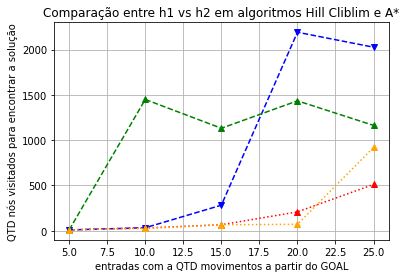

In [17]:
# qtd aleatória de vezes que movi o zero, a partir do estado objetivo "GOAL"
# pois, a melhor maneira de garantir que uma entrada tem solução
# é simplemente, pegar a solução pronta, e simplemente movimentar o zero, qtd que quiser
s5 =  [[1,2,0],[4,6,3],[7,5,8]] # 5 movimentos meus aleatórios, a partir do GOAL 
s10 = [[4,0,2],[6,1,3],[7,5,8]] #10
s15 = [[6,4,2],[7,0,3],[5,1,8]] #15
s20 = [[6,4,2],[7,8,0],[5,3,1]] #20
s25 = [[1,2,6],[5,0,7],[4,3,8]] #25 movimentos meus aleatórios, a partir do GOAL

# s5 = [[2,0,3],[1,5,6],[4,7,8]] #= 05 mov
# s10 = [[2,6,5],[1,0,3],[4,7,8]] #= 10 mov
# s15 = [[6,0,5],[2,7,3],[1,4,8]] #= 15 mov
# s20 = [[6,5,3],[2,7,8],[0,1,4]] #= 20 mov
# s25 = [[7,6,3],[0,5,8],[2,1,4]] #= 25 mov

goal  = [[1,2,3],[4,5,6],[7,8,0]] # objetivo
iniciais = [s5, s10, s15, s20, s25]

# HC == hill clibim
visitados_h1_hc = []
visitados_h2_hc = []

#  estrela == A*
visitados_h1_estrela = []
visitados_h2_estrela = []

for inicio in iniciais:
  (_, qtd_visit_h1_hc) = busca_heuristica_hc(inicio,goal,h1)
  (_, qtd_visit_h2_hc) = busca_heuristica_hc(inicio,goal,h2)
  (_, qtd_visit_h1_estrela) = busca_heuristica_estrela(inicio,goal,h1)
  (_, qtd_visit_h2_estrela) = busca_heuristica_estrela(inicio,goal,h2)
  # hill clibim h1
  visitados_h1_hc.append(qtd_visit_h1_hc)
  # hill clibim h2
  visitados_h2_hc.append(qtd_visit_h2_hc)
  # A* h1
  visitados_h1_estrela.append(qtd_visit_h1_estrela)
  # A* h2
  visitados_h2_estrela.append(qtd_visit_h2_estrela)

x = [5,10,15,20,25]# qtd de movimentos a partir do "START/GOAL"


# eixo y representa o número de nós visitados
plt.title('Comparação entre h1 vs h2 em algoritmos Hill Cliblim e A*')
plt.xlabel('entradas com a QTD movimentos a partir do GOAL')
plt.ylabel('QTD nós visitados para encontrar a solução')
# 'k' siginifica linha

# A* h1
plt.plot(x, visitados_h1_estrela, 'k--', color='blue',label='h1')
plt.plot(x, visitados_h1_estrela, 'v', color='blue',label='h1')
# A* h2
plt.plot(x, visitados_h2_estrela, 'k:', color='red', label='h2')
plt.plot(x, visitados_h2_estrela, '^', color='red', label='h2')
# HC h1
plt.plot(x, visitados_h1_hc, 'k--', color='green',label='h1')
plt.plot(x, visitados_h1_hc, 'r^', color='green',label='h1')
# HC h2
plt.plot(x, visitados_h2_hc, 'k:', color='orange', label='h2')
plt.plot(x, visitados_h2_hc, 'b^', color='orange', label='h2')

plt.grid()
plt.show()